***Презентация:*** <https://disk.yandex.ru/i/egGIK1IwUA1DFA>

# Анализ оттока Клиентов банка "Метанпром"

***Цель исследования:*** Определение сегментов Клиентов с повышенной вероятностью оттока для проведения маркетинговых кампаний.

***Описание данных***

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:
- userid — идентификатор пользователя,
- score — баллы кредитного скоринга,
- City — город,
- Gender — пол,
- Age — возраст,
- equity — количество баллов собственности,
- Balance — баланс на счёте,
- Products — количество продуктов, которыми пользуется клиент,
- CreditCard — есть ли кредитная карта,
- last_activity — активный клиент,
- est_salary — заработная плата клиента,
- Churn — ушёл или нет.

## Загрузка и обзор данных

Импорт библиотек:

In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

Загрузим датасет:

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
data.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


Посмотрим общую информацию по датасету:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00,10000.00,9974.00,10000.00,7705.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,171814.71,848.70,42.73,2.63,827794.31,1.87,0.68,0.52,147866.89,0.18
std,33708.24,65.45,12.18,1.98,1980614.15,0.79,0.47,0.50,139388.51,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142810.25,802.00,33.00,0.00,295554.16,1.00,0.00,0.00,75251.90,0.00
50%,172728.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119658.10,0.00
75%,201261.75,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174500.54,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


***Вывод:***

В распоряжении 12 столбцов и 10000 строк, в двух из них имеются пропуски.

Кредитный скоринг Клиентов от 642 до 1000. Согласно данным из открытых источников с данными баллами есть высокий шанс для одобрения кредита. Делаем вывод, что банк выдает кредиты лишь Клиентам в высоким баллом, вероятно, ввиду из-за того, что банк небольшой и снижение рисков является первостепенной задачей. Так же по этому показателю можно сказать, что Клиенты платежеспособны и ценны для банка, чем и вызвана необходимость в удержании.

Возраст от 18 до 86 лет

Оценка собственности от 0 до 9

Количество продуктов от 0 до 5. Необходимо дополнительно рассмотреть Клиентов, у которых нет продуктов банка, так как без хотя бы одного продукта Клиентом не стать.

Баланс от нуля до 119.113.552, видим чей-то ошеломительный успех, средний класс рассмотрит максимум как выброс.

Заработная плата от 2546.30 до 1.395.064,45, тоже вероятен выброс, учитывая среднюю зарплату по датасету и по Росстату. Так же минимум не соответствует МРОТ, вероятно в данных учитываются иные выплаты (пенсия, пособие), так же возможно у некоторых Клиентов "серо-белая зарплата", что достаточно распространено, и в анкете указывется только белая часть, поэтому минимум трогать не будем.

Столбцы credit_card, last_activity и churn приведем к булевому типу, так как они содержат только нули и единицы. products, score и age преобразуем в int.

## Предобработка данных

### Названия столбцов

USERID и EST_SALARY приводим к общему стилю, сократим названия для удобства, ведь похожих столбцов нет:

In [5]:
data = data.rename(columns={'USERID':'id', 'EST_SALARY':'salary'})
data.columns

Index(['id', 'score', 'city', 'gender', 'age', 'equity', 'balance', 'products',
       'credit_card', 'last_activity', 'salary', 'churn'],
      dtype='object')

### Пропуски

Рассмотрим количество пропусков, в ранее обнаруженных столбцах, процент от общего количества.

In [6]:
print(
'age:', data['age'].isna().sum(), (data['age'].isna().sum() / data['id'].count() * 100))
print(
'balance:', data['balance'].isna().sum(), (data['balance'].isna().sum() / data['id'].count() * 100))

age: 26 0.26
balance: 2295 22.95


В случае с возрастом процент пропусков небольшой, узнать возраст не представляется возможным, так что избавимся от этих строк. Пропуски в балансе  тоже не выяснить, возможно, там нули, а возможно ошибка в выгрузке данных, пропуски не должны повлиять на исследование, их оставим.

Проверим информацию о Клиентах с пропусками, сравнивая с информацией по всему датасету:

In [7]:
display(data.describe())
data.query('balance.isna()').describe()

,id,score,age,equity,balance,products,credit_card,last_activity,salary,churn
count,10000.00,10000.00,9974.00,10000.00,7705.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,171814.71,848.70,42.73,2.63,827794.31,1.87,0.68,0.52,147866.89,0.18
std,33708.24,65.45,12.18,1.98,1980614.15,0.79,0.47,0.50,139388.51,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142810.25,802.00,33.00,0.00,295554.16,1.00,0.00,0.00,75251.90,0.00
50%,172728.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119658.10,0.00
75%,201261.75,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174500.54,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


,id,score,age,equity,balance,products,credit_card,last_activity,salary,churn
count,2295.00,2295.00,2279.00,2295.00,0.00,2295.00,2295.00,2295.00,2295.00,2295.00
mean,172069.45,865.35,42.09,0.05,NaN,1.16,0.82,0.55,226310.21,0.01
std,33337.08,89.60,11.94,0.23,NaN,0.40,0.39,0.50,199771.79,0.08
min,114182.00,642.00,18.00,0.00,NaN,0.00,0.00,0.00,20274.03,0.00
25%,143095.50,871.00,33.00,0.00,NaN,1.00,1.00,0.00,120347.70,0.00
50%,172659.00,903.00,40.00,0.00,NaN,1.00,1.00,1.00,174160.68,0.00
75%,201551.00,922.00,49.00,0.00,NaN,1.00,1.00,1.00,240014.99,0.00
max,229145.00,990.00,86.00,3.00,NaN,3.00,1.00,1.00,1333687.36,1.00


У Клиентов с пропсками в балансе меньше оценка собственности, количество продуктов, реже пользуются кредитками, но средняя зарплата при этом выше. Можно было бы утверждать, что на месте пропусков должны быть нули, но последний пункт не сходится с предположением, думаю, вероятнее техническая ошибка. 

In [8]:
data = data.dropna(subset=['age'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  salary         9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1013.0+ KB


### Дубликаты

Проверим датасет на наличие дубликатов. Так как таблица содержит лишь информацию по Клиентам без разреза по времени, действиям или т.п., то по-хорошему дубликатов быть не должно.

In [9]:
data.duplicated().sum()

0

In [10]:
display(data['id'].duplicated().sum())
data[['id', 'city']].duplicated().sum()

50

0

In [11]:
data[data['id'].duplicated(keep=False)].sort_values(by='id').head(30)

,id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
1893,116540,883.00,Рыбинск,Ж,55.00,1,362756.49,3,0,1,175920.48,1
7694,116540,887.00,Ярославль,Ж,38.00,0,NaN,1,0,1,119247.61,0
4866,117943,855.00,Рыбинск,Ж,32.00,6,1036832.93,4,1,1,107792.71,1
7542,117943,880.00,Ярославль,Ж,40.00,0,NaN,1,1,0,137718.93,0
5863,120258,908.00,Рыбинск,Ж,38.00,4,2213581.63,2,0,1,160327.77,1
5896,120258,905.00,Ярославль,М,30.00,0,NaN,1,1,1,146427.96,0
1411,123461,829.00,Ярославль,Ж,59.00,0,96222.44,2,0,1,102771.55,1
8638,123461,934.00,Рыбинск,М,34.00,0,NaN,2,1,0,291619.27,0
9775,124450,758.00,Рыбинск,Ж,36.00,0,73574.07,2,0,1,79963.59,0
8164,124450,859.00,Ярославль,Ж,38.00,6,516811.20,1,1,1,95144.63,1


Всего 50 дубликатов по полю id, при ознакомлении с данными строками видим, что остальные данные не совпадают, все же это разные Клиенты. Так как в ходе исследовния нет детального рассмотрения по Клиентам в отдельности их трогать не будем.

Проверим наличие неявхых дубликатов:

In [12]:
display(data['city'].unique())
data['gender'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

array(['Ж', 'М'], dtype=object)

### Типы данных

Столбцы credit_card, last_activity и churn приведем к булевому типу, так как они содержат только нули и единицы. products, score и age преобразуем в int:

In [13]:
data[['credit_card', 'last_activity', 'churn']] = data[['credit_card', 'last_activity', 'churn']].astype('bool')
data['score'] = data['score'].astype('int16')
data[['age', 'products']] = data[['age', 'products']].astype('int8')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9974 non-null   int64  
 1   score          9974 non-null   int16  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int8   
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int8   
 8   credit_card    9974 non-null   bool   
 9   last_activity  9974 non-null   bool   
 10  salary         9974 non-null   float64
 11  churn          9974 non-null   bool   
dtypes: bool(3), float64(2), int16(1), int64(2), int8(2), object(2)
memory usage: 613.6+ KB


### Выбросы

Проверим выбросы по столбцам с возрастом, балансом и зарплатой:

In [14]:
print(plt.style.available)
plt.style.use('bmh')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


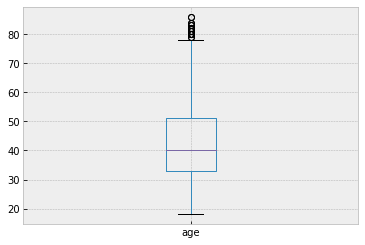

In [15]:
data.boxplot(column='age')
plt.show();

Наблюдаем выбросы на 78 годах. Средняя продолжительность жизни в России составляет 64 года, в текущем исследовании важно учитывать, что отток не должен быть вызван естественными причинами, необходимо рассмотривать Клиентов, которые сами решили отказаться от услуг банка. Посмотрим, сколько Клиентов старше 64 лет:

In [16]:
old = data.query('age > 64')['age'].count()
display(old / data['age'].count() * 100)
old

5.805093242430319

579

In [17]:
old2 = data.query('age > 78')['age'].count()
display(old2 / data['age'].count() * 100)
old2

0.22057349107679966

22

Выбросы по возрасту не удаляем.

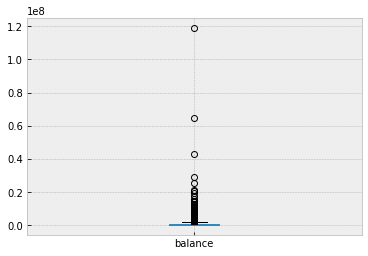

In [18]:
data.boxplot(column='balance')
plt.show();

In [19]:
data.query('balance > 4000000')['balance'].count()

111

In [20]:
data.query('balance > 4000000')['balance'].sum() / data['balance'].sum() * 100

16.44539326322451

При оценке суммы баланса выходит, что Клиенты имеют на счетах 16.53% от беланса всех счетов в сумме. 

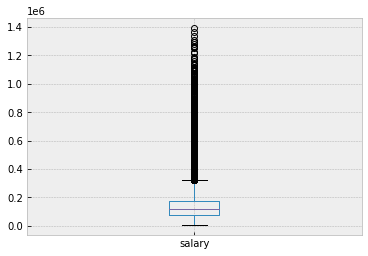

In [21]:
data.boxplot(column='salary')
plt.show();

In [22]:
data.query('salary > 1200000')['salary'].count()

14

Клиентов с большой зарплатой тоже не трогаем.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9974 non-null   int64  
 1   score          9974 non-null   int16  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int8   
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int8   
 8   credit_card    9974 non-null   bool   
 9   last_activity  9974 non-null   bool   
 10  salary         9974 non-null   float64
 11  churn          9974 non-null   bool   
dtypes: bool(3), float64(2), int16(1), int64(2), int8(2), object(2)
memory usage: 613.6+ KB


## Исследовательский анализ

### Распределение категориальных и количественных данных Клиентов

#### Города

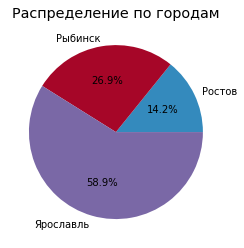

In [24]:
city = data.groupby('city').agg({'id':'count'}).reset_index()
plt.pie(city['id'], labels=city['city'], autopct='%1.1f%%')
plt.title('Распределение по городам')
plt.show();

Большая часть Клиентов находится в Ярославле, что логично, это наибольший город, а Рыбинск и Ростов находятся в его области.

#### Пол

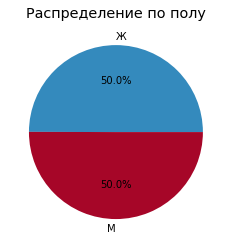

In [25]:
gender = data.groupby('gender').agg({'id':'count'}).reset_index()
plt.pie(gender['id'], labels=gender['gender'], autopct='%1.1f%%')
plt.title('Распределение по полу')
plt.show();

50/50 идеальная выборка в этом критерии.

#### Наличие кредитной карты

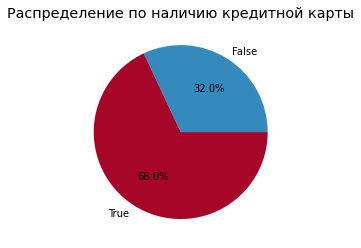

In [26]:
credit = data.groupby('credit_card').agg({'id':'count'}).reset_index()
plt.pie(credit['id'], labels=credit['credit_card'], autopct='%1.1f%%')
plt.title('Распределение по наличию кредитной карты')
plt.show();

Большая часть Клиентов имеет кредитную карту.

#### Активность

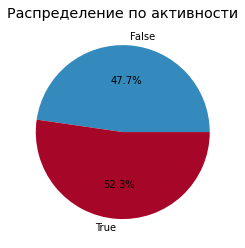

In [27]:
activity = data.groupby('last_activity').agg({'id':'count'}).reset_index()
plt.pie(activity['id'], labels=activity['last_activity'], autopct='%1.1f%%')
plt.title('Распределение по активности')
plt.show();

Активных Клиентов больше лишь на 4.6%, для бизнеса, думаю, показатель не хороший, необходимо рекомендовать заказчику иссделование активности Клиентов, так как это, логически, является большим показателем оттока, а в некоторых компаниях это его вид.

#### Отток

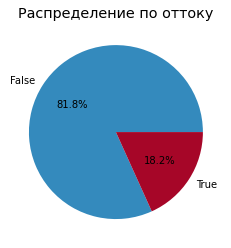

In [28]:
churn = data.groupby('churn').agg({'id':'count'}).reset_index()
plt.pie(churn['id'], labels=churn['churn'], autopct='%1.1f%%')
plt.title('Распределение по оттоку')
plt.show();

Процент оттока действительно велик, если рассматривать как бизнес-метрику.

#### Кредитный скоринг

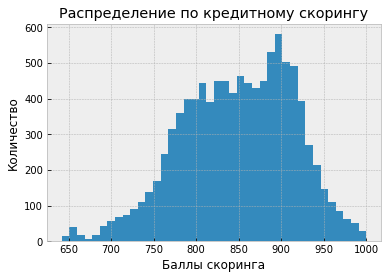

In [29]:
plt.hist(data['score'], bins=40)
plt.title('Распределение по кредитному скорингу')
plt.xlabel('Баллы скоринга')
plt.ylabel('Количество')
plt.show();

Видим обширную сосредоточенность от 750 до 950 баллов, при этом есть пик на отметке в 900 баллов. Убеждаюсь в предыдущих выводах, банк не хочет рисковать и предпочитает Клиентов с высоким кредитным скорингом, но для пущей точности было бы хорошо знать все ли представленные Клиенты имеют кредит и измеряют данный показатель всем или только Клиентам с кредитом.
Точно можем сказать, что Клиенты банка благонадежны как заемщики.

#### Количество баллов собственности

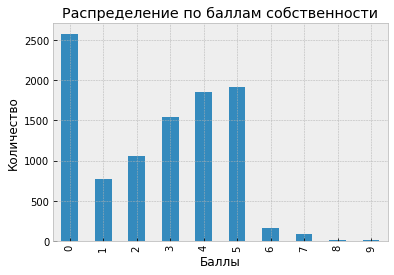

In [30]:
data.groupby('equity')['id'].count().plot(kind='bar')
plt.title('Распределение по баллам собственности')
plt.xlabel('Баллы')
plt.ylabel('Количество')
plt.show();

Нет четкого распределения по количеству баллов собственности. Больше всего Клиентов с нулем, от 1 до 5 идет постепенное повышение, а дальше резкий спад. 

#### Количество продуктов

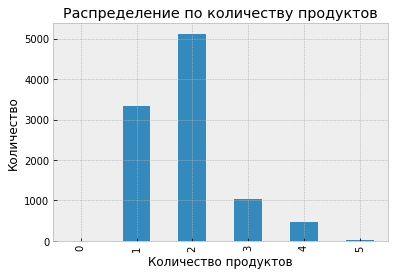

In [31]:
data.groupby('products')['id'].count().plot(kind='bar');
plt.title('Распределение по количеству продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Количество')
plt.show();

Большая часть имеет 2 продукта банка, на втором месте Клиенты с одним продуктом.

#### Возраст

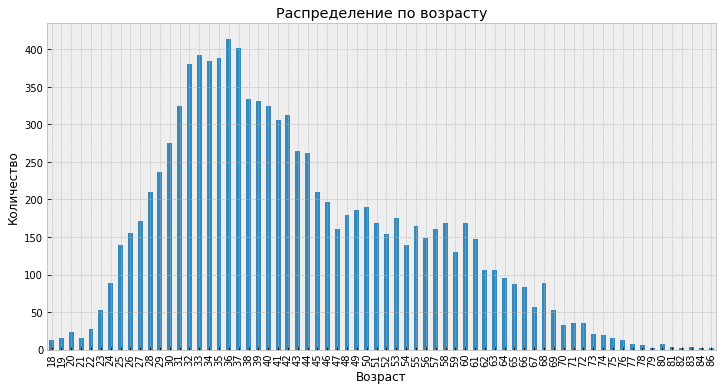

In [32]:
data.groupby('age')['id'].count().plot(kind='bar', figsize=(12, 6))
plt.title('Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show();

Основная масса Клиентов сосредоточена в возрасте от 28 до 46 лет, выше идет плавный спад.

#### Баланс

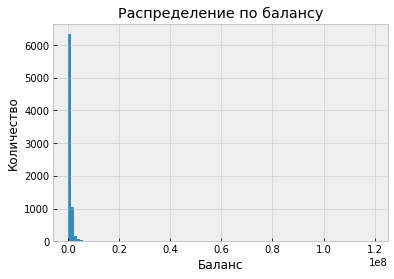

In [33]:
plt.hist(data['balance'], bins=100)
plt.title('Распределение по балансу')
plt.xlabel('Баланс')
plt.ylabel('Количество')
plt.show();

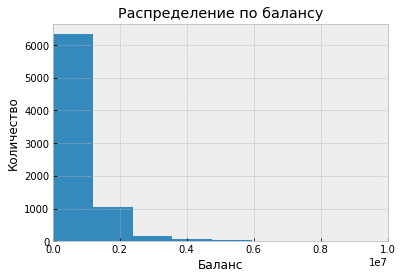

In [82]:
plt.hist(data['balance'], bins=100)
plt.title('Распределение по балансу')
plt.xlabel('Баланс')
plt.ylabel('Количество')
plt.xlim(0, 10000000)
plt.show();

Исключим Клиентов с большим доходом, чтобы рассмотреть график:

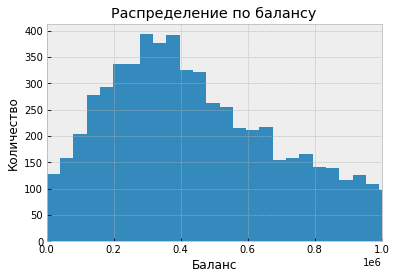

In [64]:
bal = data.query('balance < 4000000')
plt.hist(bal['balance'], bins=100)
plt.title('Распределение по балансу')
plt.xlabel('Баланс')
plt.ylabel('Количество')
plt.xlim(0, 1000000)
plt.show();

Чаще Клиенты хранят на счету от 100 до 650 тысяч

#### Зарплата

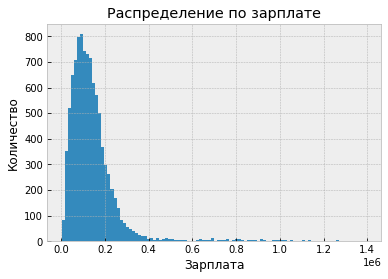

In [86]:
plt.hist(data['salary'], bins=100)
plt.title('Распределение по зарплате')
plt.xlabel('Зарплата')
plt.ylabel('Количество')
plt.show();

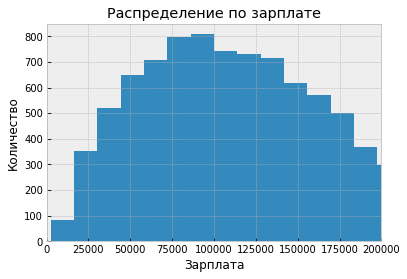

In [87]:
plt.hist(data['salary'], bins=100)
plt.title('Распределение по зарплате')
plt.xlabel('Зарплата')
plt.ylabel('Количество')
plt.xlim(0, 200000)
plt.show();

Основная масса зарабатывает от 25 до 175 тысяч.

#### Вывод

По представленным данным большая часть Клиентов имеет следующие данные:

- 58.9% Клиентов из Ярославля, 26.9% из Рыбинска и 14.2% из Ростова;
- Женщины и мужчины в равном количестве;
- 68% имеют кредитную карту;
- Только 52.3% Клиентов являются активными;
- ***Доля оттока составляет 18.2%***;
- Клиенты благонадежны и имеют кредитный скоринг от 750 до 950 баллов;
- Балл собственности 0;
- Имеют два продукта банка;
- Возраст от 28 до 48 лет;
- Хранят на счету от 100 до 650 тысяч;
- Зарабатывают от 25 до 175 тысяч.

### Поиск взаимосвязи категории к оттоку

#### Влияние пола на отток

In [37]:
def outflow_hist(column):
    sns.histplot(data=data, hue='churn', x=column, stat='density', common_norm=False)
    plt.title(f'Отток по {column}')
    plt.legend(['отток', 'клиенты'])
    plt.xlabel(column)
    plt.ylabel('')
    plt.show()

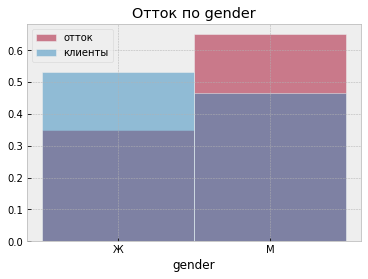

In [38]:
outflow_hist('gender')

Мужчины больше подвержены оттоку.

#### Влияние города на отток

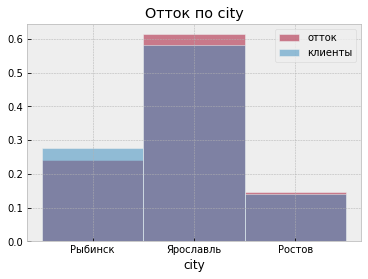

In [39]:
outflow_hist('city')

В основном отток наблюдается в Ярославле, немного в Ростове.

#### Влияние возраста на отток

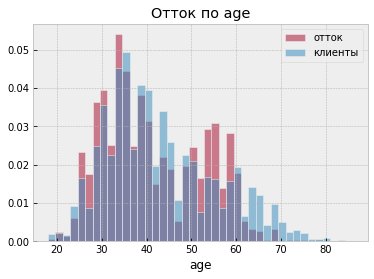

In [40]:
outflow_hist('age')

Наблюдаем повышенный отток в возрасте от 25 до 35 и от 50 до 60.

#### Влияние количества объектов собственности и баллов на отток

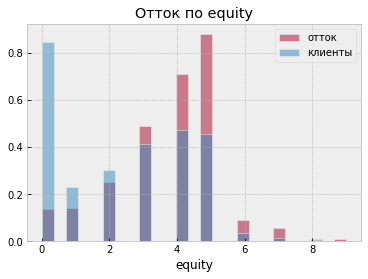

In [41]:
outflow_hist('equity')

Высокоотточны Клиенты, у которых 3 балла собственности и выше.

#### Влияние баланса на счете на отток

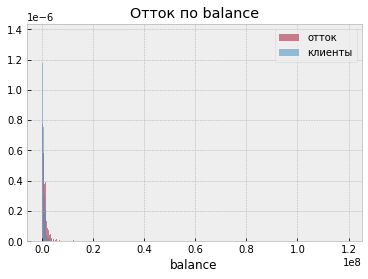

In [42]:
outflow_hist('balance')

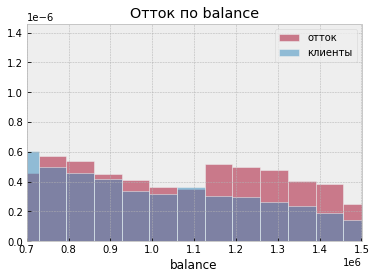

In [65]:
sns.histplot(data=bal, hue='churn', x='balance', stat='density', common_norm=False)
plt.title(f'Отток по balance')
plt.legend(['отток', 'клиенты'])
plt.xlabel('balance')
plt.ylabel('')
plt.xlim(700000, 1500000)
plt.show()

Клиенты в оттоке чаще имеют на счету от 750 тысяч.

#### Влияние количества продуктов банка на отток

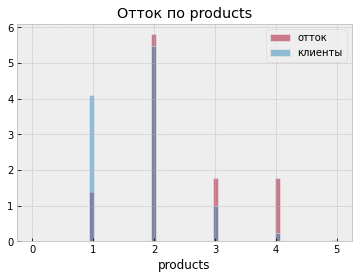

In [44]:
outflow_hist('products')

Клиенты в оттоке имеют от 2 продуктов банка.

#### Влияние наличия кредитной карты на отток

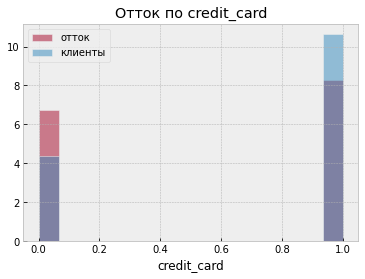

In [45]:
outflow_hist('credit_card')

Высокооточные Клиенты не имеют кредитной карты.

#### Влияние активности на отток

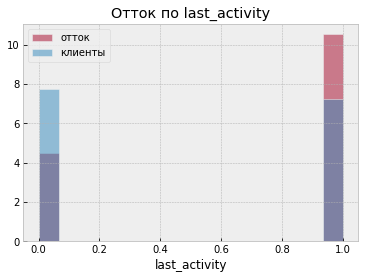

In [46]:
outflow_hist('last_activity')

Вопреки логике активные Клиенты чаще уходят, другие, вероятно просто забыли о продуктах, которые у них есть.

#### Влияние заработной платы на отток

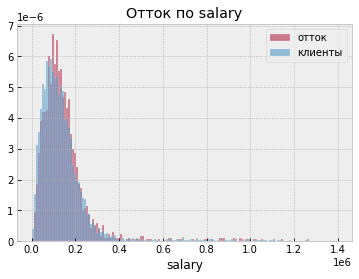

In [47]:
outflow_hist('salary')

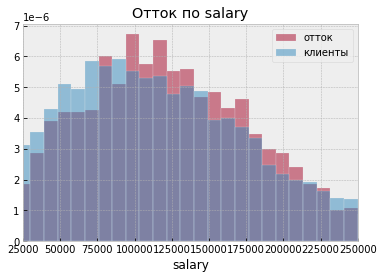

In [48]:
sns.histplot(data=data, hue='churn', x='salary', stat='density', common_norm=False)
plt.title(f'Отток по salary')
plt.legend(['отток', 'клиенты'])
plt.xlabel('salary')
plt.ylabel('')
plt.xlim(25000, 250000)
plt.show()

В основном уходят Клиенты с зарплатой от 80 до 220 тысяч.

#### Вывод

Высокоотточные Клиенты имеют следующие признаки:

- Мужчины;
- Проживают в Ярославле;
- Возраст от 25 до 35 и от 50 до 60;
- 3 балла собственности и выше;
- Имеют на счету от 750 тысяч;
- Имеют от 2 продуктов банка;
- Не имеют кредитной краты;
- Являются активным Клиентом;
- Зарабатывают от 80 до 220 тысяч.

### Корреляция признаков

#### Корреляция между признаками

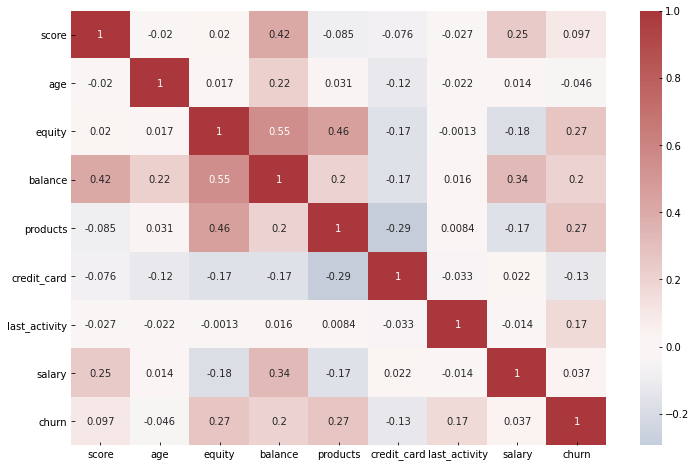

In [79]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.drop('id', axis=1).corr(method='spearman'), annot=True, cmap='vlag', center=0)
plt.show();

Зависимости между признаками не наблюдаем, но наибольшая между балансом и баллами собственности.

#### Корреляция признаков к оттоку

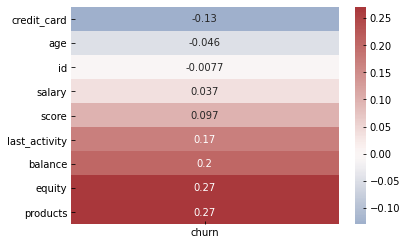

In [80]:
sns.heatmap(data.corr(method='spearman').loc[:, ['churn']].sort_values('churn').drop('churn'), 
            annot=True, cmap='vlag', center=0)
plt.show()

## Статистический анализ

### Различие дохода у текущих Клиентов и Клиентов в оттоке

Гипотезы:

- H₀ - Средний доход между Клиентами, которые ушли и котороые остались не различается;
- H₁ - Средний доход ушедших Клиентов выше, чем у тех, что остались.

In [51]:
client = data[data['churn'] == False]
not_a_client = data[data['churn'] == True]

np.var(client['salary']) / np.var(not_a_client['salary'])

1.3477444051500698

Отношение большей дисперсии к меньшей менее 4, считаем по Стьютенту:

In [52]:
alpha = 0.05

results = st.ttest_ind(
    client['salary'],
    not_a_client['salary'],
    alternative='less'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нулевая гипотеза не отвергнута")

print('Средний доход у Клиентов:', client['salary'].mean().round(2))
print('Средний доход у Клиентов в оттоке:', not_a_client['salary'].mean().round(2))

p-значение: 0.43239307946055944
Нулевая гипотеза не отвергнута
Средний доход у Клиентов: 147674.64
Средний доход у Клиентов в оттоке: 148289.7


Вопреки данным по оттоку статистической разницы в доходе нет.

### Различие в количестве продуктов

Гипотезы:

- H₀ - Среднее количество продуктов между Клиентами, которые ушли и котороые остались не различается;
- H₁ - Среднее количество продуктов ушедших Клиентов выше, чем у тех, что остались.

In [53]:
np.var(not_a_client['products']) / np.var(client['products'])

1.6753035784382204

In [54]:
alpha = 0.05

results = st.ttest_ind(
    client['products'],
    not_a_client['products'],
    alternative='less'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нулевая гипотеза не отвергнута")

print('Среднее количество продуктов у Клиентов:', client['products'].mean().round(2))
print('Среднее количество продуктов у Клиентов в оттоке:', not_a_client['products'].mean().round(2))

p-значение: 1.0382823348850812e-207
Отвергаем нулевую гипотезу
Среднее количество продуктов у Клиентов: 1.76
Среднее количество продуктов у Клиентов в оттоке: 2.38


Чем больше продуктов, тем выше шанс оттока.

### Различие в балансе

Гипотезы:

- H₀ - Средний баланс между Клиентами, которые ушли и котороые остались не различается;
- H₁ - Средний баланс ушедших Клиентов выше, чем у тех, что остались.

In [55]:
np.var(not_a_client['balance']) / np.var(client['balance'])

1.0836707674153878

In [56]:
alpha = 0.05

results = st.ttest_ind(
    client['balance'].dropna(),
    not_a_client['balance'].dropna(),
    alternative='less', equal_var = False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нулевая гипотеза не отвергнута")

print('Средний баланс у Клиентов:', client['balance'].mean().round(2))
print('Средний баланс у Клиентов в оттоке:', not_a_client['balance'].mean().round(2))

p-значение: 8.658704289556784e-14
Отвергаем нулевую гипотезу
Средний баланс у Клиентов: 733031.63
Средний баланс у Клиентов в оттоке: 1134458.21


Клиенты с более внушительным балансом больше подвержены оттоку.

## Сегменты Клиентов по признакам оттока

### Сегмент 1

Критерии сегмента:

- Мужчины;
- Возраст от 25 до 35 и от 50 до 60 лет;
- На счету более 750 тысяч.

In [83]:
seg_1 = data.query('balance >= 750000 and ((age >= 50 and age <= 60) or (age >= 25 and age <= 35))')
seg_1_churn = (seg_1.query('churn == True')['id'].count() / seg_1['id'].count() * 100).round(2)
share = (data.query('churn == True')['id'].count() / data['id'].count() * 100).round(2)

print(f'Доля ушедших Клиентов всего: {share}%')
print(f'Доля ушедших Клиентов по сегменту 1: {seg_1_churn}%')
print('Количество Клиентов в сегменте', seg_1['id'].count())

Доля ушедших Клиентов всего: 18.24%
Доля ушедших Клиентов по сегменту 1: 46.57%
Количество Клиентов в сегменте 1239


### Сегмент 2

Критерии сегмента:

- Женщины;
- Зарплата от 80 до 220 тысяч;
- От 3 баллов собственности.

In [84]:
seg_2 = data.query('gender == "Ж" and salary >= 80000 and salary <= 220000 and equity > 2')
seg_2_churn = (seg_2.query('churn == True')['id'].count() / seg_1['id'].count() * 100).round(2)

print(f'Доля ушедших Клиентов всего: {share}%')
print(f'Доля ушедших Клиентов по сегменту 2: {seg_2_churn}%')
print('Количество Клиентов в сегменте', seg_2['id'].count())

Доля ушедших Клиентов всего: 18.24%
Доля ушедших Клиентов по сегменту 2: 26.55%
Количество Клиентов в сегменте 1616


### Сегмент 3

Критерии сегмента:

- Ярославцы;
- Имеют от 2 продуктов банка;
- Являются активными.

In [85]:
seg_3 = data.query('city == "Ярославль" and products > 1 and last_activity == True')
seg_3_churn = (seg_3.query('churn == True')['id'].count() / seg_1['id'].count() * 100).round(2)

print(f'Доля ушедших Клиентов всего: {share}%')
print(f'Доля ушедших Клиентов по сегменту 3: {seg_3_churn}%')
print('Количество Клиентов в сегменте', seg_3['id'].count())

Доля ушедших Клиентов всего: 18.24%
Доля ушедших Клиентов по сегменту 3: 55.61%
Количество Клиентов в сегменте 1923


## Вывод

По представленным данным большая часть Клиентов имеет следующие данные:

- 58.7% Клиентов из Ярославля, 27% из Рыбинска и 14.3% из Ростова;
- Женщины и мужчины в равном количестве;
- 68.2% имеют кредитную карту;
- Только 52.2% Клиентов являются активными;
- Доля оттока составляет 18.1%;
- Клиенты благонадежны и имеют кредитный скоринг от 750 до 950 баллов;
- Балл собственности 0;
- Имеют два продукта банка;
- Возраст от 28 до 48 лет;
- Хранят на счету от 100 до 650 тысяч;
- Зарабатывают от 25 до 175 тысяч.

Высокоотточные Клиенты имеют следующие признаки:

- Мужчины;
- Проживают в Ярославле;
- Возраст от 25 до 35 и от 50 до 60;
- 3 балла собственности и выше;
- Имеют на счету от 750 тысяч;
- Имеют от 2 продуктов банка;
- Не имеют кредитной краты;
- Являются активным Клиентом;
- Зарабатывают от 80 до 220 тысяч.

Выделены следующие сегменты:

***Сегмент 1***

Критерии сегмента:
- Мужчины;
- Возраст от 25 до 35 и от 50 до 60 лет;
- На счету более 750 тысяч.

Доля Клиентов в оттоке по сегменту 1: 46.57%

Количество Клиентов в сегменте: 1239

***Сегмент 2***

Критерии сегмента:
- Женщины;
- Зарплата от 80 до 220 тысяч;
- От 3 баллов собственности.

Доля Клиентов в оттоке по сегменту 2: 26.55%

Количество Клиентов в сегменте: 1616

***Сегмент 3***

Критерии сегмента:
- Ярославцы;
- Имеют от 2 продуктов банка;
- Являются активными.

Доля Клиентов в оттоке по сегменту 3: 55.61%

Количество Клиентов в сегменте: 1923

***Рекомендации:***

По представленным данным банк может повлиять только таким показателям как наличие кредитной карты и баланс. Они имеют хорошие показатели по оттоку и необходимо увеличить продажи кредитных карт, вкладов, накопительных счетов.

Так же в рамках борьбы с оттоком отдел маркетинга может придумать дополнительные кампании, удовлетворяющие потребностям Клиентов. Например для сегмента 1 подойдут новые выгодные вклады, сегменту 2 кэшбэк на товары для дома/машины.
